In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('C:/DS/DS ASSIGNMENTS/Linear Regression/delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization

In [3]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dataset[dataset.duplicated()].shape

(0, 2)

In [7]:
dataset[dataset.duplicated()]

,Delivery Time,Sorting Time


In [8]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

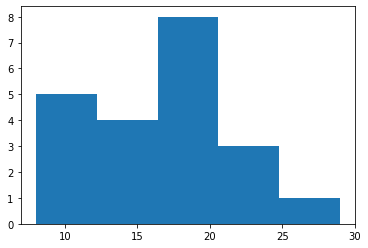

In [9]:
plt.hist(dataset.delivery_time, bins=5)

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

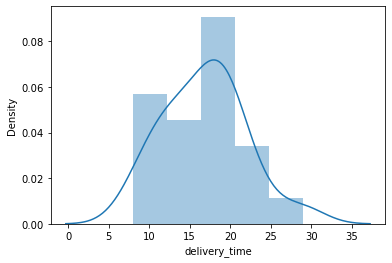

In [10]:
sns.distplot(dataset['delivery_time'])

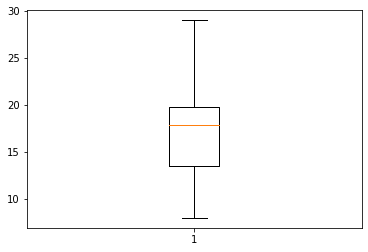

In [11]:
plt.boxplot(dataset['delivery_time'])
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

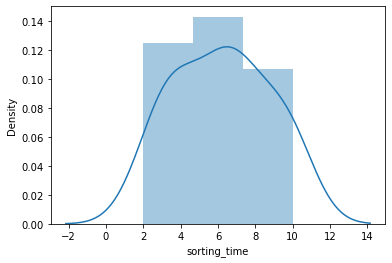

In [12]:
sns.distplot(dataset['sorting_time'])

## Data Transformation

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

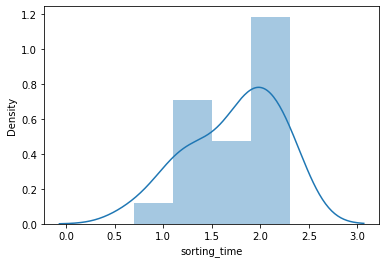

In [13]:
#plot with applied log transformation on sorting time
sns.distplot(np.log(dataset['sorting_time']))

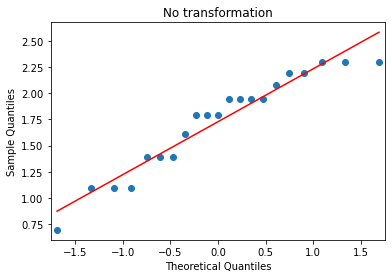

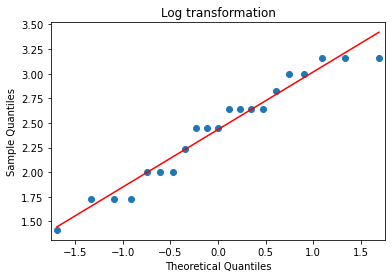

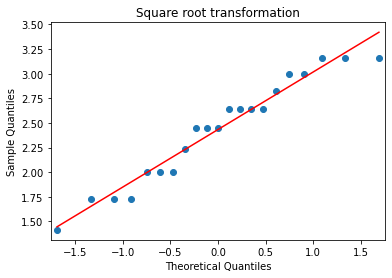

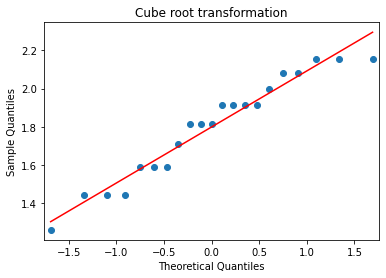

In [15]:
smf.qqplot(np.log(dataset['sorting_time']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(dataset['sorting_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['sorting_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

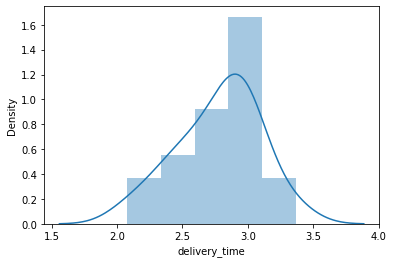

In [16]:
sns.distplot(np.log(dataset['delivery_time']))

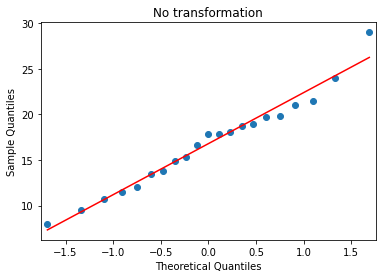

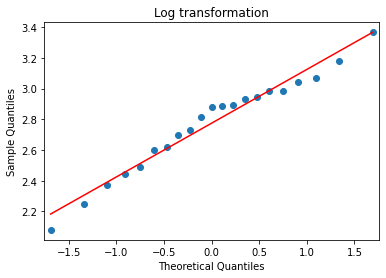

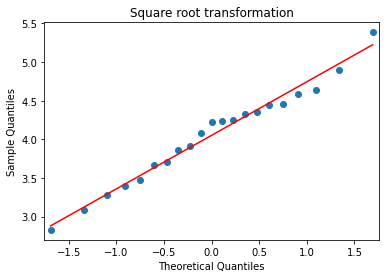

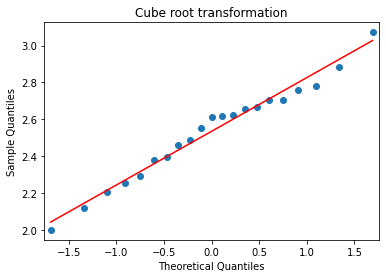

In [17]:
smf.qqplot(dataset['delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()


## Correlation Analysis

In [18]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

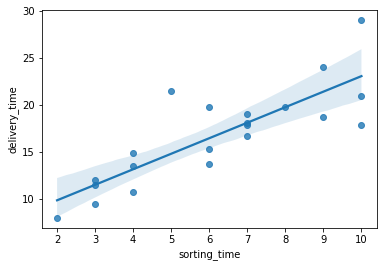

In [19]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

## Model Building

In [20]:
model1=sm.ols("delivery_time~sorting_time",data=dataset).fit()

In [21]:
# Finding Coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        16:07:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#model2 with log transformation on sorting time
model2=sm.ols("delivery_time~np.log(sorting_time)",data=dataset).fit()

In [24]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        16:07:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#model3 with log transformation on delivery time
model3=sm.ols("np.log(delivery_time)~sorting_time",data=dataset).fit()

In [27]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 12 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                           16:07:16   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#model4 with sqrt transformation on sorting time
model4=sm.ols("delivery_time~np.sqrt(sorting_time)",data=dataset).fit()

In [30]:
model4.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [31]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        16:07:18   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#model5 with sqrt transformation on delivery time
model5=sm.ols("np.sqrt(delivery_time)~(sorting_time)",data=dataset).fit()

In [33]:
model5.params

Intercept       2.772731
sorting_time    0.206632
dtype: float64

In [34]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.704
Model:                                OLS   Adj. R-squared:                  0.688
Method:                     Least Squares   F-statistic:                     45.20
Date:                    Thu, 12 Jan 2023   Prob (F-statistic):           2.00e-06
Time:                            16:07:21   Log-Likelihood:                -6.6646
No. Observations:                      21   AIC:                             17.33
Df Residuals:                          19   BIC:                             19.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#model6 with cbrt transformation on delivery time
model6=sm.ols("delivery_time~np.cbrt(sorting_time)",data=dataset).fit()

In [36]:
model6.params

Intercept               -11.579201
np.cbrt(sorting_time)    15.767284
dtype: float64

In [37]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.48e-06
Time:                        16:07:23   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(sorting_time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#model7 with cbrt transformation on delivery time
model7=sm.ols("np.cbrt(delivery_time)~sorting_time",data=dataset).fit()

In [39]:
model7.params

Intercept       1.995120
sorting_time    0.087217
dtype: float64

In [40]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.708
Model:                                OLS   Adj. R-squared:                  0.693
Method:                     Least Squares   F-statistic:                     46.08
Date:                    Thu, 12 Jan 2023   Prob (F-statistic):           1.75e-06
Time:                            16:07:26   Log-Likelihood:                 11.651
No. Observations:                      21   AIC:                            -19.30
Df Residuals:                          19   BIC:                            -17.21
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9951      0.086     23.283      0.000       1.816       2.174
sorting_time     0.0872      0.013      6.788      0.000       0.060       0.114
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.966
Skew:                           0.523   Prob(JB):                        0.617
Kurtosis:                       3.106   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### so we will consider the model having highest R-Squared value which is the log transformation - model3

In [41]:
# Finding tvalues and pvalues for model3 who is having highest R sqaured value
model3.tvalues , model3.pvalues

(Intercept       20.601357
 sorting_time     6.836088
 dtype: float64,
 Intercept       1.857343e-14
 sorting_time    1.592708e-06
 dtype: float64)

In [42]:
#Finding Rsquared Values
model3.rsquared , model3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

## Model Predictions

In [43]:
# Manual prediction for say sorting time 5
delivery_time = (2.121372) + (0.105552)*(5)
delivery_time

2.649132

In [44]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [45]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [46]:
model3.predict(data_pred)

0    2.649130
1    2.965785
dtype: float64

## Que 2  Salary_hike - Build a prediction model for Salary_hike

In [47]:
dataset=pd.read_csv('C:/DS/DS ASSIGNMENTS/Linear Regression/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA and Visualization

In [48]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [49]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
dataset[dataset.duplicated()].shape

(0, 2)

In [52]:
dataset[dataset.duplicated()]

,YearsExperience,Salary


(array([6., 9., 5., 4., 6.]),
 array([ 1.1 ,  2.98,  4.86,  6.74,  8.62, 10.5 ]),
 <BarContainer object of 5 artists>)

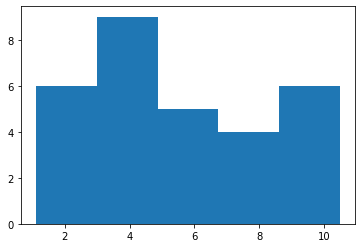

In [53]:
plt.hist(dataset.YearsExperience, bins=5)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

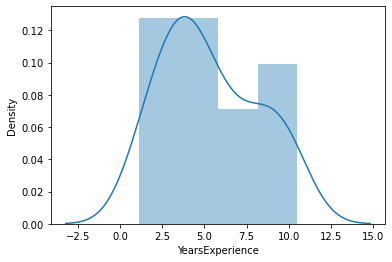

In [54]:
sns.distplot(dataset['YearsExperience'])

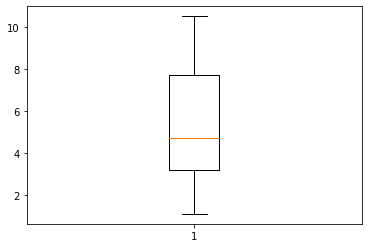

In [55]:
plt.boxplot(dataset['YearsExperience'])
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

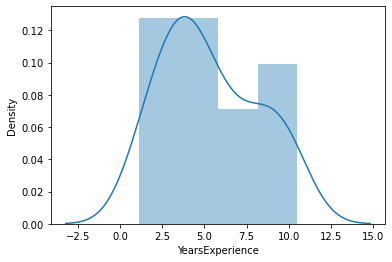

In [56]:
sns.distplot(dataset['YearsExperience'])

## Data Transformation

<AxesSubplot:xlabel='Salary', ylabel='Density'>

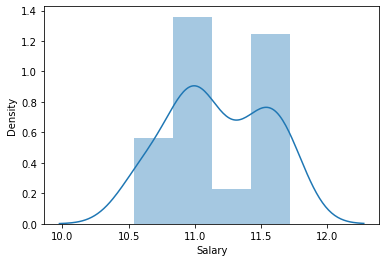

In [57]:
#plot with applied log transformation on salary
sns.distplot(np.log(dataset['Salary']))

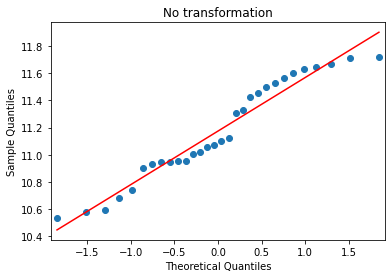

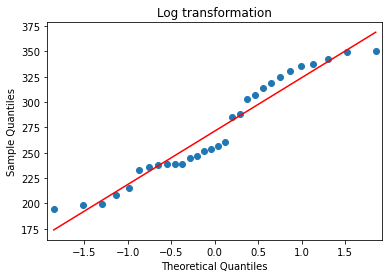

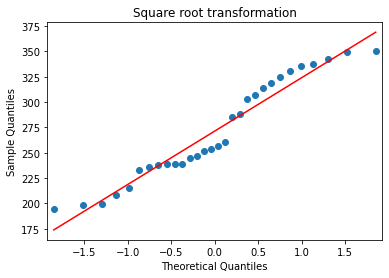

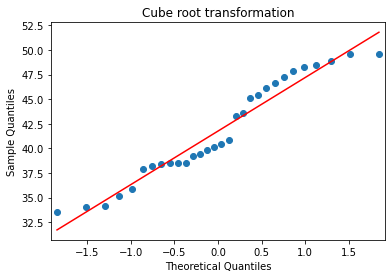

In [58]:
smf.qqplot(np.log(dataset['Salary']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(dataset['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

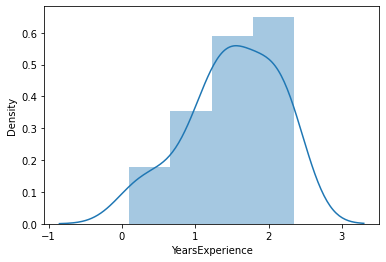

In [59]:
sns.distplot(np.log(dataset['YearsExperience']))

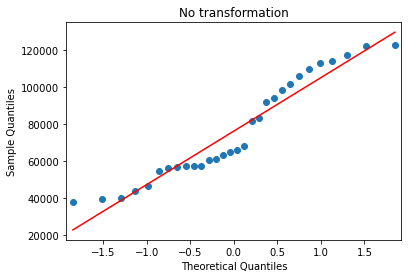

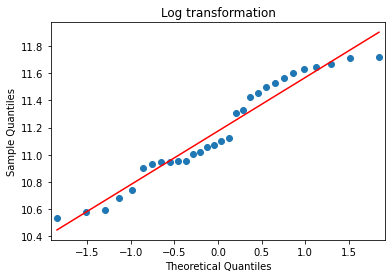

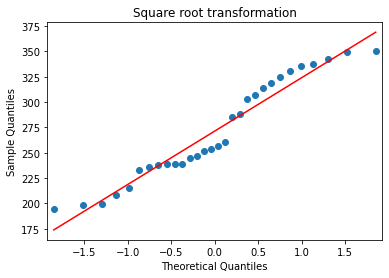

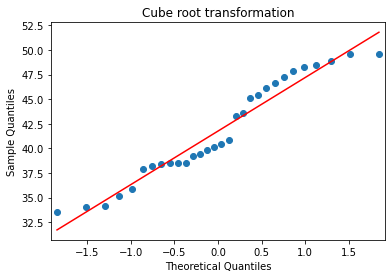

In [60]:
smf.qqplot(dataset['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

## Correlation Analysis

In [61]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

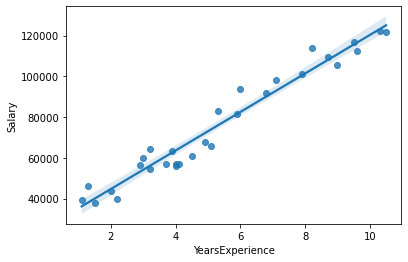

In [62]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

## Model Building

In [63]:
model=sm.ols("Salary~YearsExperience",data=dataset).fit()

In [64]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        16:08:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#model2 with log transformation on YearsExperience
model1=sm.ols("Salary~np.log(YearsExperience)",data=dataset).fit()

In [67]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        16:08:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#model2 with log transformation on Salary
model2=sm.ols("np.log(Salary)~YearsExperience",data=dataset).fit()

In [70]:
model2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        16:08:11   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#model3 with sqrt transformation on YearsExperience
model3=sm.ols("Salary~np.sqrt(YearsExperience)",data=dataset).fit()

In [73]:
model3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [74]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        16:08:14   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#model4 with sqrt transformation on Salary
model4=sm.ols("np.sqrt(Salary)~YearsExperience",data=dataset).fit()

In [76]:
model4.params

Intercept          180.700221
YearsExperience     17.056532
dtype: float64

In [77]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           9.78e-20
Time:                        16:08:16   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#model5 with cbrt transformation on YearsExperience
model5=sm.ols("Salary~np.cbrt(YearsExperience)",data=dataset).fit()

In [79]:
model5.params

Intercept                  -57049.503555
np.cbrt(YearsExperience)    78964.327230
dtype: float64

In [80]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.91e-16
Time:                        16:08:18   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(YearsExperience)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#model6 with cbrt transformation on YearsExperience
model6=sm.ols("np.cbrt(Salary)~YearsExperience",data=dataset).fit()

In [82]:
model6.params

Intercept          32.453864
YearsExperience     1.751471
dtype: float64

In [83]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.42e-19
Time:                        16:08:21   Log-Likelihood:                -47.463
No. Observations:                  30   AIC:                             98.93
Df Residuals:                      28   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.4539      0.479     67.821      0.000      31.474      33.434
YearsExperience     1.7515      0.080     21.966      0.000       1.588       1.915
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.611
Skew:                           0.385   Prob(JB):                        0.447
Kurtosis:                       2.166   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## so we will consider the model having highest R-Squared value which is - model

In [84]:
# Finding tvalues and pvalues for model3 who is having highest R sqaured value
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [85]:
#Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Prediction

In [86]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [87]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [88]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [89]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64